In [2]:
import os
import csv

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

In [3]:
pd.__version__
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

In [69]:
AARM_DEVICES = ["jetson_cpu", "jetson_gpu", "rpi4_cpu",]  # pi3_cpu
x86_DEVICES= ["herron_cpu", "herron_gpu", "laptop_cpu"]

SEQ_LENGTHS = [2 ** seqlen for seqlen in range(10)]

BASELINE_MODELS = ["bert", "roberta"] # deberta, ibert
EFFICIENT_MODELS = ["distilbert", "mobile_bert", 
                    "squeeze_bert", "funnel_transformer"]
OTHER_TRANSFORMER_MODELS = ['longformer', 'albert', 'ibert']
VISION_MODEL = [] # TODO: Add vision model visuals

In [10]:
EXP_DIR = "experiments/0903_transformers/"
DEVICE_LIST = ["laptop_cpu"]

In [26]:
all_results = pd.concat([
    pd.read_csv(os.path.join(EXP_DIR, f"{device}.csv"))
    for device in DEVICE_LIST
])

In [ ]:
all_results


,accelerator,avg_memory,batch_size,device,macs,max_memory,mean,model,requires_grad,sequence_length,total_params,trainable_params
0,0.0,1138.846094,1.0,cpu,8.552448e+07,1138.863281,0.026762,bert,0.0,1.0,109482240.0,0.0
1,0.0,721.152344,1.0,cpu,1.704591e+08,721.152344,0.043807,bert,0.0,2.0,109482240.0,0.0
2,0.0,721.628906,1.0,cpu,3.403284e+08,721.628906,0.044131,bert,0.0,4.0,109482240.0,0.0
3,0.0,721.948437,1.0,cpu,6.800671e+08,722.007812,0.052969,bert,0.0,8.0,109482240.0,0.0
4,0.0,722.549479,1.0,cpu,1.359544e+09,722.660156,0.066619,bert,0.0,16.0,109482240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.0,609.316406,1.0,cpu,8.525906e+08,609.429688,0.037730,squeeze_bert,0.0,32.0,51094272.0,0.0
83,0.0,613.396484,1.0,cpu,1.704591e+09,613.511719,0.067586,squeeze_bert,0.0,64.0,51094272.0,0.0
84,0.0,618.503472,1.0,cpu,3.408593e+09,620.832031,0.141960,squeeze_bert,0.0,128.0,51094272.0,0.0
85,0.0,626.525608,1.0,cpu,6.816596e+09,634.171875,0.350635,squeeze_bert,0.0,256.0,51094272.0,0.0


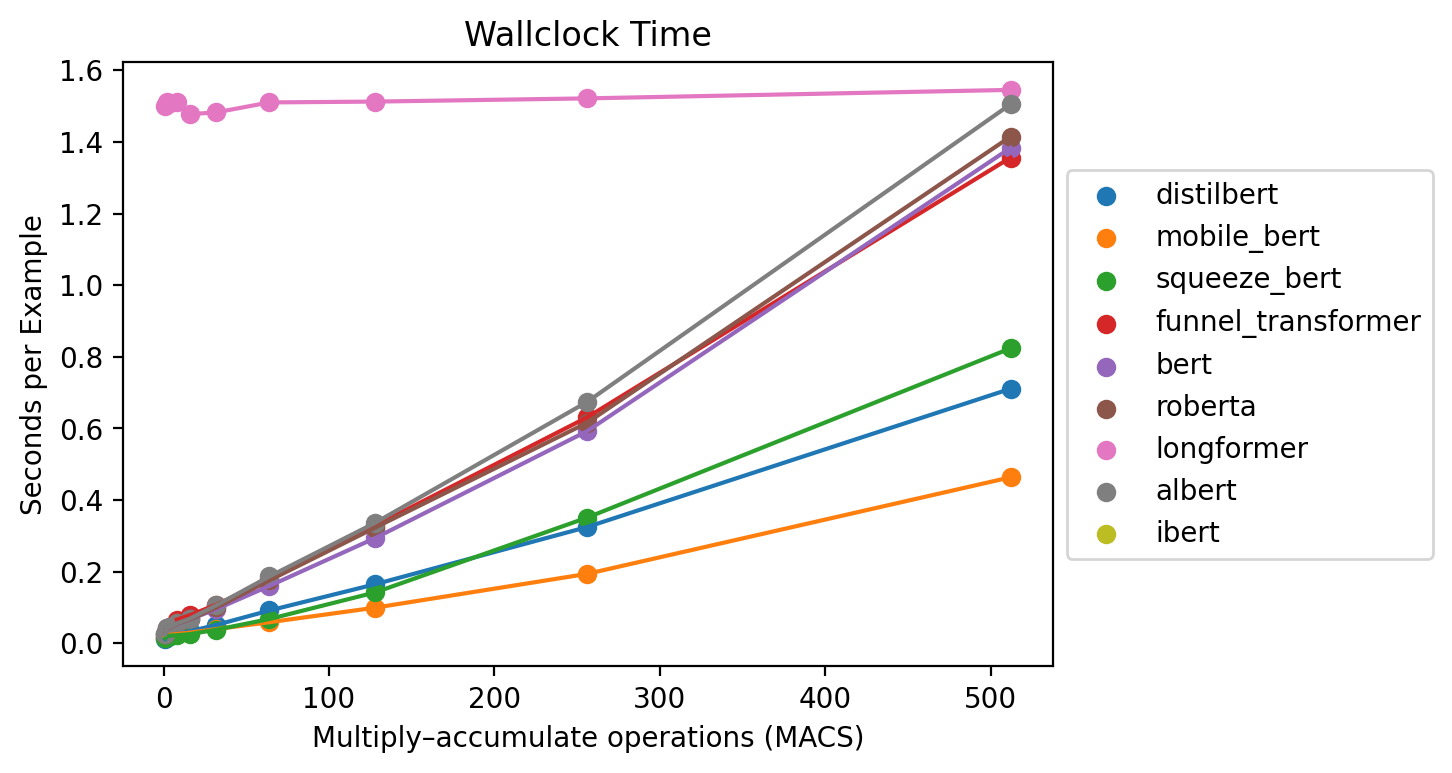

In [71]:
plt.ylabel("Seconds per Example")
plt.xlabel("Multiply–accumulate operations (MACS)")
plt.title("Wallclock Time")

# for device in DEVICE_LIST:
results = all_results.loc[all_results['device'] == "cpu"]
for model in EFFICIENT_MODELS + BASELINE_MODELS + OTHER_TRANSFORMER_MODELS:
    seq_lens = results.loc[results['model'] == model]['sequence_length'].tolist()
    avg_memory = results.loc[results['model'] == model]['avg_memory'].tolist()
    mac_result = results.loc[results['model'] == model]['macs'].tolist()
    wallclock_result = results.loc[results['model'] == model]['mean'].tolist()
    param_count = results.loc[results['model'] == model]['total_params'].tolist()
    
    plt.scatter(seq_lens, wallclock_result, label=f"{model}")
    plt.plot(seq_lens, wallclock_result)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [61]:
mac_result

[85524480.0,
 170459136.0,
 340328448.0,
 680067072.0,
 1359544320.0,
 2718498816.0,
 5436407808.0,
 10872225792.0,
 21743861760.0,
 43487133696.0]

In [20]:
results

,accelerator,avg_memory,batch_size,device,macs,max_memory,mean,model,requires_grad,sequence_length,total_params,trainable_params
0,0.0,1138.846094,1.0,cpu,8.552448e+07,1138.863281,0.026762,bert,0.0,1.0,109482240.0,0.0
1,0.0,721.152344,1.0,cpu,1.704591e+08,721.152344,0.043807,bert,0.0,2.0,109482240.0,0.0
2,0.0,721.628906,1.0,cpu,3.403284e+08,721.628906,0.044131,bert,0.0,4.0,109482240.0,0.0
3,0.0,721.948437,1.0,cpu,6.800671e+08,722.007812,0.052969,bert,0.0,8.0,109482240.0,0.0
4,0.0,722.549479,1.0,cpu,1.359544e+09,722.660156,0.066619,bert,0.0,16.0,109482240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.0,609.316406,1.0,cpu,8.525906e+08,609.429688,0.037730,squeeze_bert,0.0,32.0,51094272.0,0.0
83,0.0,613.396484,1.0,cpu,1.704591e+09,613.511719,0.067586,squeeze_bert,0.0,64.0,51094272.0,0.0
84,0.0,618.503472,1.0,cpu,3.408593e+09,620.832031,0.141960,squeeze_bert,0.0,128.0,51094272.0,0.0
85,0.0,626.525608,1.0,cpu,6.816596e+09,634.171875,0.350635,squeeze_bert,0.0,256.0,51094272.0,0.0


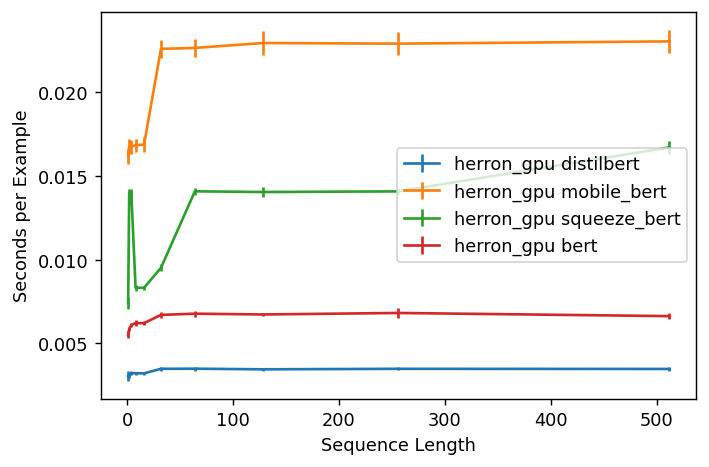

In [52]:
plt.ylabel("Seconds per Example")
plt.xlabel("Sequence Length")
# plt.xscale('log')

for device in ['herron_gpu']:
    results_df = wallclock_results.loc[all_results['device'] == device]
    for model in EFFICIENT_MODELS + ['bert']:
        model_entries =  results_df.loc[results_df['model'] == model].sort_values('sequence_length')
        seq_lens = model_entries['sequence_length']
        mean_time = model_entries['mean']

        fifthpct = mean_time - model_entries['5_pct']
        ninetyfifth_time = model_entries['95_pct'] - mean_time
        
        plt.errorbar(seq_lens, mean_time, yerr=np.array(fifthpct, ninetyfifth_time), label=f"{device} {model}")
        plt.legend()

In [47]:
mean_time =['mean']

In [238]:
wallclocks = pd.read_csv("log/wallclock.csv")
wallclocks.set_index(["Model", "Device"], inplace=True)

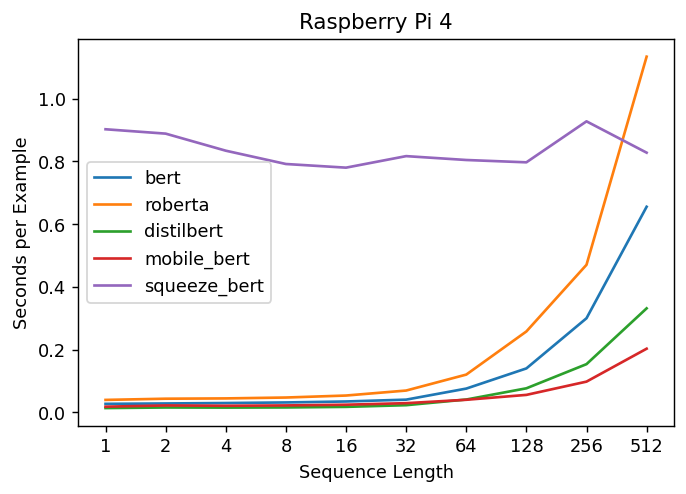

In [260]:
for model in BASELINE_MODELS + EFFICIENT_MODELS:
#     print(model)
    plt.plot(wallclocks.loc[model, "laptop"], label=model)

# plt.yscale('log')
plt.title("Raspberry Pi 4")
plt.ylabel("Seconds per Example")
plt.xlabel("Sequence Length")
plt.legend()

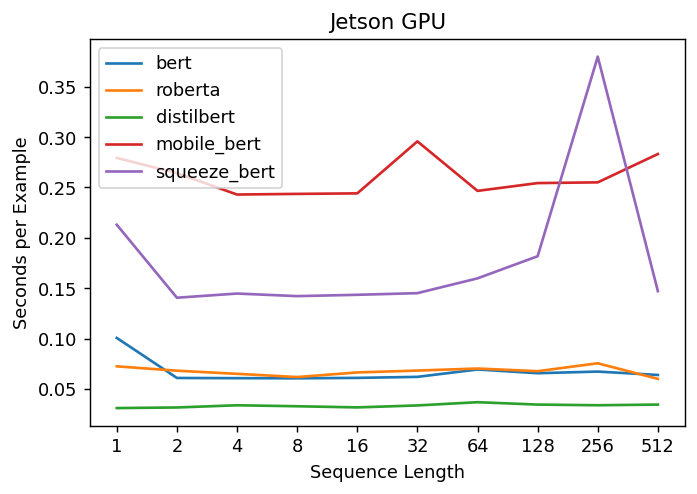

In [259]:
for model in BASELINE_MODELS + EFFICIENT_MODELS:
#     print(model)
    plt.plot(wallclocks.loc[model, "jetson_gpu"], label=model)

# plt.yscale('log')
plt.title("Jetson GPU")
plt.ylabel("Seconds per Example")
plt.xlabel("Sequence Length")
plt.legend(loc='upper left')